#  Reactive TR

In [1]:
from radd import build, vis

In [2]:
d = 'FinalRe/tr'
if not os.path.isdir(pth+d):
      os.mkdir(pth+d)
os.chdir(pth+d)
m = build.Model(data=redata, kind='xradd', dynamic='hyp', tb=.650, depends_on={'tr':'Cond'})
m.optimize(tol=1.e-5, multiopt=True, maxfev=5000, ntrials=10000)

basinhopping step 0: f 0.00864128
basinhopping step 1: f 0.0585767 trial_f 0.0585767 accepted 1  lowest_f 0.00864128
basinhopping step 2: f 0.103921 trial_f 0.103921 accepted 1  lowest_f 0.00864128
basinhopping step 3: f 0.642084 trial_f 0.642084 accepted 1  lowest_f 0.00864128
basinhopping step 4: f 0.0189668 trial_f 0.0189668 accepted 1  lowest_f 0.00864128
basinhopping step 5: f 0.226252 trial_f 0.226252 accepted 1  lowest_f 0.00864128
basinhopping step 6: f 0.253572 trial_f 0.253572 accepted 1  lowest_f 0.00864128
basinhopping step 7: f 0.0311709 trial_f 0.0311709 accepted 1  lowest_f 0.00864128
basinhopping step 8: f 0.28728 trial_f 0.28728 accepted 1  lowest_f 0.00864128
basinhopping step 9: f 0.354755 trial_f 0.354755 accepted 1  lowest_f 0.00864128
adaptive stepsize: acceptance rate 0.900000 target 0.500000 new stepsize 0.0555556 old stepsize 0.05
basinhopping step 10: f 0.354755 trial_f 1.08072 accepted 0  lowest_f 0.00864128
basinhopping step 11: f 0.354755 trial_f 0.849146 a

In [ ]:
vis.plot_fits(m.avg_y[0], m.fits[:16], kind='radd', colors=["#4168B7"]*2,  data=redata.query('Cond=="bsl"'))
plt.savefig('rebsl_onset_fits.png', dpi=500)
plt.savefig('rebsl_onset_fits.svg', rasterized=True)
vis.plot_fits(m.avg_y[1], m.fits[16:], kind='radd', colors=["#4168B7"]*2,  data=redata.query('Cond=="pnl"'))
plt.savefig('repnl_onset_fits.png', dpi=500)
plt.savefig('repnl_onset_fits.svg', rasterized=True)


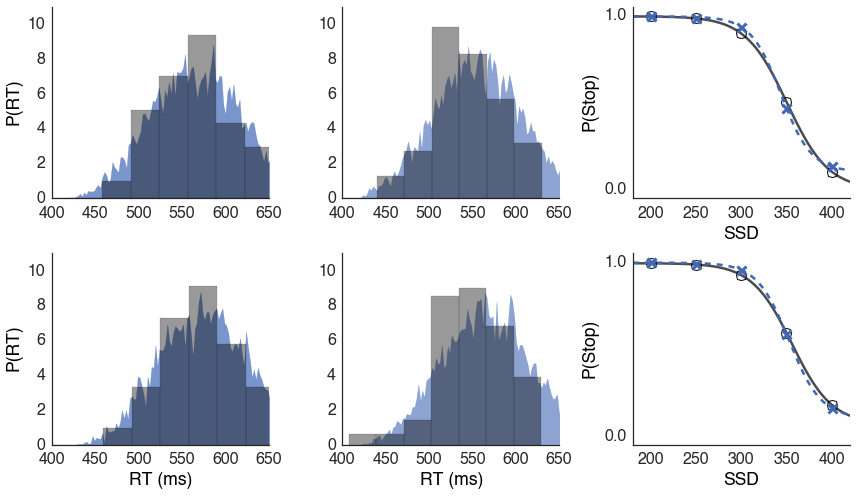

In [6]:
f, axes = plt.subplots(2,3,figsize=(12, 7))
sns.set_context('notebook', font_scale=1.6)
fits=m.fits.reshape(2,16)
y=m.avg_y
labels=['Baseline', 'Caution']
datas=[redata.query('Cond=="bsl"'), redata.query('Cond=="pnl"')]

for ax in axes.flatten():
      if ax.is_last_col():
            continue
      ax.set_ylim(0,11)

for i in range(m.ncond):
      vis.plot_fits(y[i], fits[i], kind='radd', colors=["#4168B7"]*2, data=datas[i], axes=axes[i])

plt.savefig('re_onset_fits.png', dpi=500)
plt.savefig('re_onset_fits.svg', rasterized=True)